# AIM: Predicting house price

### Exploratory Data Analysis (Data understanding)
### Normalization (Data preparation)
### Train-Test Split (Validation)
### Linear Regression (Algorithm)
### R2 (Evaluation)

In [1]:
 # Load up the packages and data
import pandas as pd
import seaborn as sns
import sklearn

In [3]:
housingdata=pd.read_excel("Real estate valuation data set.xlsx")
housingdata.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


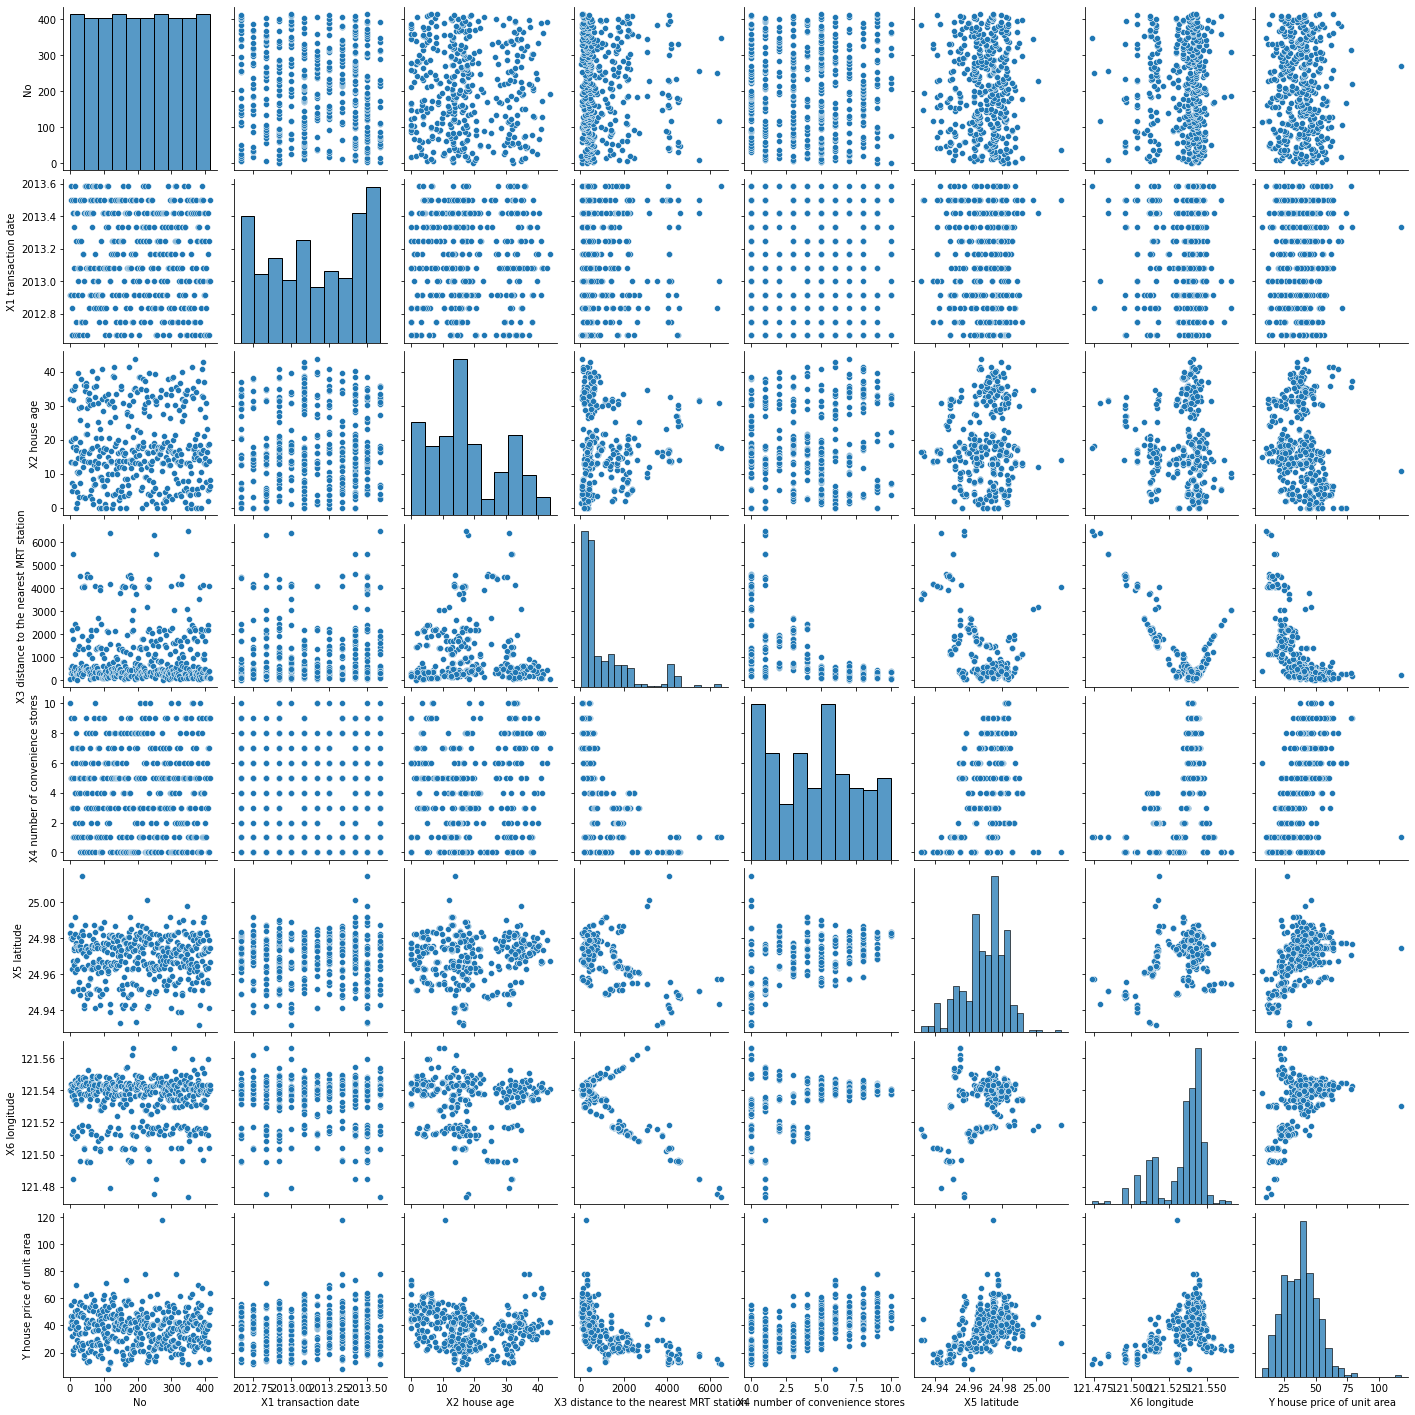

In [4]:
 #Getting an idea of the patterns of the data
sns.pairplot(housingdata)

## Normalization (Data Preparation)

In [5]:
# we do not need the first and second column 
housingdata = housingdata.iloc[:,2:]

In [7]:
housingdata.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [13]:
# normalizing the data for easy interpretation for machine learning 
from sklearn import preprocessing
housingdata_norm=preprocessing.normalize(housingdata)
housingdata_norm=pd.DataFrame(housingdata_norm)
housingdata_norm.columns = housingdata.columns

# do not have to normalize the output(Y house price of unit area)
housingdata_norm['Y house price of unit area'] = housingdata['Y house price of unit area']
housingdata_norm.head()



,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.201737,0.535100,0.063043,0.157500,0.766225,37.9
1,0.058362,0.917610,0.026936,0.074764,0.363757,42.2
2,0.023025,0.972905,0.008656,0.043258,0.210416,47.3
3,0.022999,0.971790,0.008646,0.043209,0.210175,54.8
4,0.012132,0.947692,0.012132,0.060611,0.294916,43.1


In [15]:
# splitting x and y (train and test sets)
x = housingdata_norm.iloc[:,:5]
y=housingdata_norm.iloc[:,5:6]
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


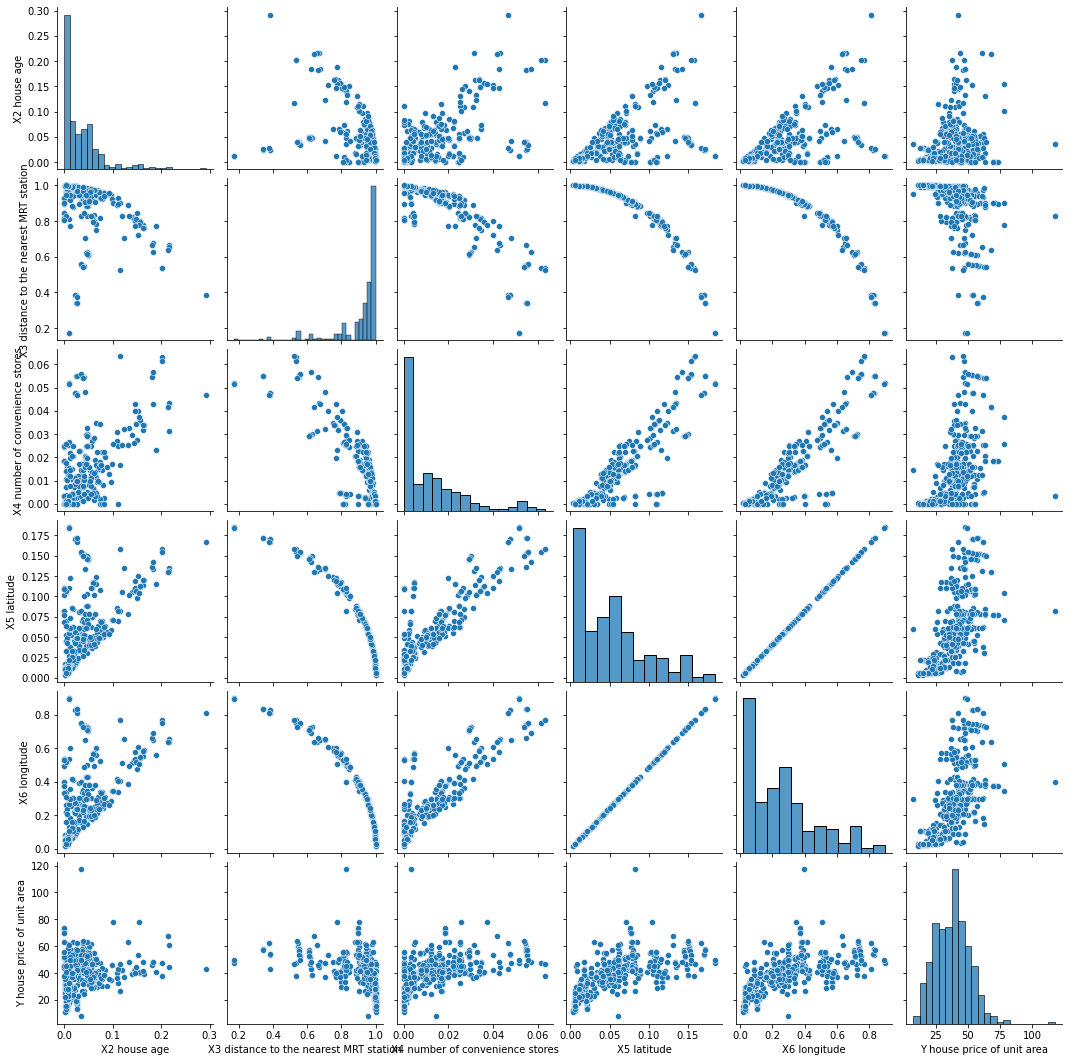

In [16]:
#correlation plot for normalized data:
sns.pairplot(housingdata_norm)

In [17]:
housingdata_norm.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,-0.421179,0.556401,0.537865,0.537767,0.277851
X3 distance to the nearest MRT station,-0.421179,1.000000,-0.858782,-0.908956,-0.909024,-0.509469
X4 number of convenience stores,0.556401,-0.858782,1.000000,0.877750,0.877721,0.579531
X5 latitude,0.537865,-0.908956,0.877750,1.000000,1.000000,0.662669
X6 longitude,0.537767,-0.909024,0.877721,1.000000,1.000000,0.662566
Y house price of unit area,0.277851,-0.509469,0.579531,0.662669,0.662566,1.000000


## Train-Test Split (Validation)

In [18]:
#80/20 train test split
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=55)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 5)
(83, 5)
(331, 1)
(83, 1)


In [19]:
x_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
380,0.044112,0.905155,0.015643,0.078156,0.380250
41,0.004129,0.999517,0.000000,0.006131,0.029864
217,0.070727,0.941229,0.015156,0.063094,0.307007
70,0.040030,0.548629,0.054586,0.151473,0.737176
87,0.004154,0.999516,0.000000,0.006131,0.029864


In [24]:
x_test.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
293,0.031084,0.945538,0.017269,0.061593,0.299846
84,0.037232,0.945041,0.017260,0.061561,0.299688
184,0.005385,0.998827,0.000000,0.009530,0.046424
85,0.000000,0.929614,0.024682,0.068476,0.333333
231,0.003974,0.999523,0.000000,0.006118,0.029805


## Linear Regression (Algorithm)

In [25]:
 #Sets up the linear regression model
from sklearn import linear_model
lm=linear_model.LinearRegression(fit_intercept=True)
#Trains the linear regression algorithm on the training dataset
model=lm.fit(x_train,y_train)

In [27]:
#Intercept value
model.intercept_

array([-34.91939464])

In [32]:
model.coef_.T

array([[-8.63828908e+01],
       [ 5.83685461e+01],
       [ 2.00712176e+02],
       [ 1.04529408e+05],
       [-2.14034058e+04]])

In [34]:
#Coefficent values
coeff_df = pd.DataFrame(model.coef_.T, x.columns, columns=['Coefficient'])
coeff_df

# y = mx + b
# an increase in one unit of house age change the house unit price by 1 x -86.93 - 34.92 = -121.3

,Coefficient
X2 house age,-86.382891
X3 distance to the nearest MRT station,58.368546
X4 number of convenience stores,200.712176
X5 latitude,104529.407984
X6 longitude,-21403.405846


In [35]:
#Display more data on linear regression
from statsmodels import regression
import statsmodels.api as sm
import numpy as np
def linreg(X,Y):
 # Running the linear regression
 X = sm.add_constant(X)
 model = regression.linear_model.OLS(Y, X).fit()
 a = model.params[0]
 b = model.params[1]
 X = X[:, 1]
 return model.summary()
linreg(x_train.values, y_train.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     74.73
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           6.07e-52
Time:                        16:52:39   Log-Likelihood:                -1212.0
No. Observations:                 331   AIC:                             2436.
Df Residuals:                     325   BIC:                             2459.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.9194     10.999     -3.175      0.002     -56.558     -13.280
x1           -86.3829     15.386     -5.614      0.000    -116.652     -56.113
x2            58.3685     10.411      5.606      0.000      37.887      78.850
x3           200.7122     82.604      2.430      0.016      38.207     363.218
x4          1.045e+05   2.62e+04      3.993      0.000     5.3e+04    1.56e+05
x5          -2.14e+04   5379.895     -3.978      0.000    -3.2e+04   -1.08e+04
==============================================================================
Omnibus:                      186.472   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2673.807
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                      16.338   Cond. No.                     7.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# F-statistics indicates how well the model is rejecting null hypothesis 
# High F means good at prediciting result

# std error show how far the feature points are from the line hence lower the better
 

In [38]:
#Make predictions of train and test set
pred=lm.predict(x_train)
predd=lm.predict(x_test)

# Evaluation

In [39]:
#checking accuracy using r2:
from sklearn.metrics import r2_score
#Training r2
train_r2_score = r2_score(y_train,pred)
print('Training coefficient of determination:', train_r2_score)

Training coefficient of determination: 0.5348106470660423


In [40]:
#Test r2
test_r2_score = r2_score(y_test,predd)
print('Test coefficient of determination:', test_r2_score)

Test coefficient of determination: 0.5488671559665322


In [41]:
# low coefficient means not good prediction , underfitting

In [92]:
compare1 = y_test.copy()
compare1['predictions'] = predd
compare1.head(10)

,Y house price of unit area,predictions
358,45.1,45.905249
350,42.3,39.304588
373,52.2,53.145499
399,37.3,34.836797
369,22.8,23.943499
72,36.3,36.903596
262,53.0,50.846949
140,51.4,49.148340
93,16.1,20.216924
70,59.0,60.053673


In [58]:
from sklearn import metrics
#Training set
print('Train Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train,pred))
print('Train Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, pred))
#Test set
print('Test Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predd))
print('Test Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predd)) 

# MSE takes outlier into account at large factor

Train Mean Absolute Error (MAE): 6.3159690437486935
Train Mean Squared Error (MSE): 88.7179584725852
Test Mean Absolute Error (MAE): 5.9614377434616745
Test Mean Squared Error (MSE): 69.61245394528785


## Improving the model

In [59]:
# look at p>t(p value for two tailed test), normally want it to be as low as possible
# p value for x3 is not-zero hence it is good to remove the x3 feature (distance to mrt station)

In [62]:
housingdata = housingdata.drop(columns=['X3 distance to the nearest MRT station'])

In [69]:
housingdata_norm=preprocessing.normalize(housingdata.iloc[:,2:])
housingdata_norm=pd.DataFrame(housingdata_norm)
housingdata_norm.columns = housingdata.iloc[:,2:].columns
housingdata_norm['Y house price of unit area'] = housingdata['Y house price of unit area']

In [70]:
housingdata_norm.head()

,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.238802,0.074626,0.186437,0.907002,37.9
1,0.146829,0.067767,0.188094,0.915152,42.2
2,0.099586,0.037438,0.187097,0.910078,47.3
3,0.097514,0.036660,0.183206,0.891150,54.8
4,0.038010,0.038010,0.189892,0.923959,43.1


In [71]:
# data split 
x = housingdata_norm.iloc[:,:4]
y=housingdata_norm.iloc[:,4:5]
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
#Trains the linear regression algorithm on the training dataset
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)

#Make predictions of train and test set
pred=lm.predict(x_train)
predd=lm.predict(x_test)

In [80]:
compare = y_test.copy()
compare['predictions'] = predd
compare.head()

,Y house price of unit area,predictions
358,45.1,45.905249
350,42.3,39.304588
373,52.2,53.145499
399,37.3,34.836797
369,22.8,23.943499


In [87]:
visual = compare.iloc[:50,:]

In [74]:
#Training r2
train_r2_score = r2_score(y_train,pred)
print('Training coefficient of determination:', train_r2_score)

#Test r2
test_r2_score = r2_score(y_test,predd)
print('Test coefficient of determination:', test_r2_score)


# R coefficient has increased drastically compared to previous model hence better prediction, good fitting

Training coefficient of determination: 0.972957353534436
Test coefficient of determination: 0.967621572245262


In [75]:
#Training set
print('Train Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train,pred))
print('Train Mean Squared Error (MSE):', metrics.mean_squared_error(y_train, pred))

#Test set
print('Test Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predd))
print('Test Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predd))

# low MAE/MSE means better prediction

Train Mean Absolute Error (MAE): 1.7253073774291106
Train Mean Squared Error (MSE): 5.086464961551129
Test Mean Absolute Error (MAE): 1.8215946726858787
Test Mean Squared Error (MSE): 5.431796768102205


In [76]:
#Display Linear Regression statistics
linreg(x_train.values, y_train.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2932.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          4.24e-254
Time:                        17:37:01   Log-Likelihood:                -738.87
No. Observations:                 331   AIC:                             1488.
Df Residuals:                     326   BIC:                             1507.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        416.0361      4.706     88.402      0.000     406.778     425.294
x1           -60.2889      1.506    -40.025      0.000     -63.252     -57.326
x2            26.9634      6.855      3.933      0.000      13.478      40.449
x3          1.192e+04   1554.973      7.663      0.000    8856.963     1.5e+04
x4         -2850.9272    318.183     -8.960      0.000   -3476.878   -2224.976
==============================================================================
Omnibus:                       54.739   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.096
Skew:                          -0.857   Prob(JB):                     1.02e-25
Kurtosis:                       5.325   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

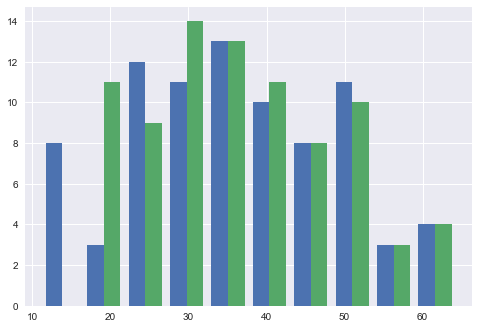

In [90]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.hist(compare)
plt.show